In [20]:
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns
import numpy as np
import polars.selectors as cs

In [3]:
df = pd.read_excel("../dano_base.xlsx")
df

,Unnamed: 0,application_id,primary_income_dt,party_rk,product_code,account_own_flg,sch_flg,success_flg,validation_flg,reject_flg,...,inkas_flg,cash_out_flg,vzr_flg,concierge_flg,cb_flg,invest_flg,mobile_flg,out_c2c_flg,car_ins_flg,percent_flg
0,0,3379c95477164e679ef80291a36a50ec,2023-03-05,772887927.0,DCV,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,2e23732fef4749e1ae7a89ec978b7bf7,2023-03-05,858351423.0,DCV,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2,df795c04bd834c0d8a2960d3b0593938,2023-03-09,864683115.0,DCV,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,7c2512d6bf2d47fe91eefc75f8062698,2023-03-13,294312227.0,DCV,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,ca547a88dd0c42f2a50657af01b87317,2023-03-03,815163498.0,DCV,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73707,73707,8168937fbe4c447ca420614d4e032d94,2023-03-14,380072334.0,DCV,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
73708,73708,18de6aaefd9c478a9a2f7a04750e3d56,2023-03-21,941415613.0,DCV,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
73709,73709,f03232cd563044f299b400a49ad95534,2023-03-03,863738223.0,DCV,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
73710,73710,269435523adf4ec79361fa9fec903967,2023-03-09,956387021.0,DCV,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


<Axes: xlabel='ccr_account_first_open_dt', ylabel='count'>

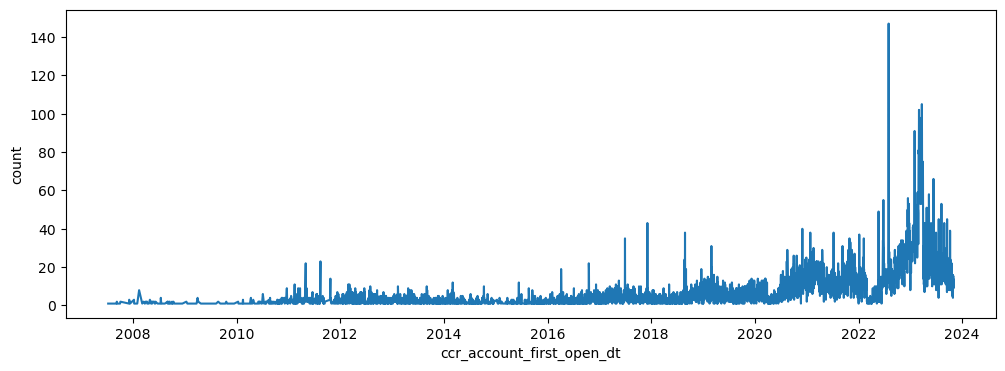

In [13]:
dfpl = pl.from_pandas(df)
fix, ax = plt.subplots(figsize=(12,4))
sns.lineplot(dfpl.group_by("ccr_account_first_open_dt").count().to_pandas(), x="ccr_account_first_open_dt", y="count")

<Axes: xlabel='primary_income_dt', ylabel='count'>

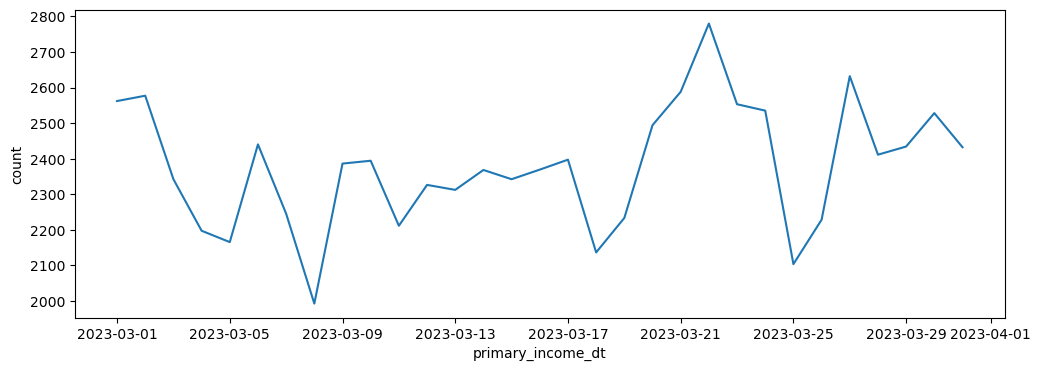

In [14]:
dfpl = pl.from_pandas(df)
fix, ax = plt.subplots(figsize=(12, 4))
sns.lineplot(
    dfpl.group_by("primary_income_dt").count().to_pandas(),
    x="primary_income_dt",
    y="count",
)

<Axes: xlabel='dep_account_first_open_dt', ylabel='count'>

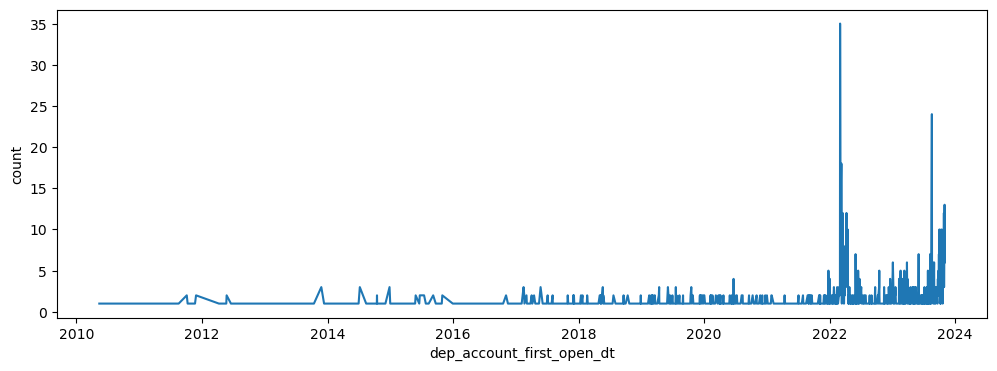

In [15]:
dfpl = pl.from_pandas(df)
fix, ax = plt.subplots(figsize=(12, 4))
sns.lineplot(
    dfpl.group_by("dep_account_first_open_dt").count().to_pandas(),
    x="dep_account_first_open_dt",
    y="count",
)

<Axes: xlabel='cur_account_first_open_dt', ylabel='count'>

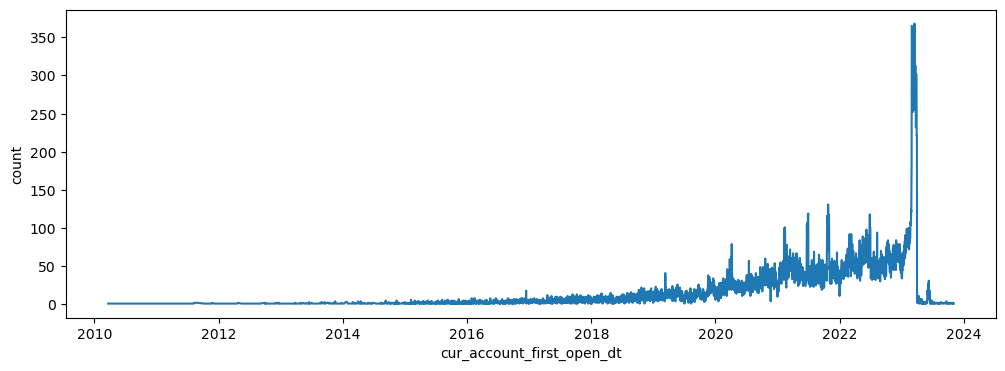

In [16]:
dfpl = pl.from_pandas(df)
fix, ax = plt.subplots(figsize=(12, 4))
sns.lineplot(
    dfpl.group_by("cur_account_first_open_dt").count().to_pandas(),
    x="cur_account_first_open_dt",
    y="count",
)

<Axes: xlabel='sav_account_first_open_dt', ylabel='count'>

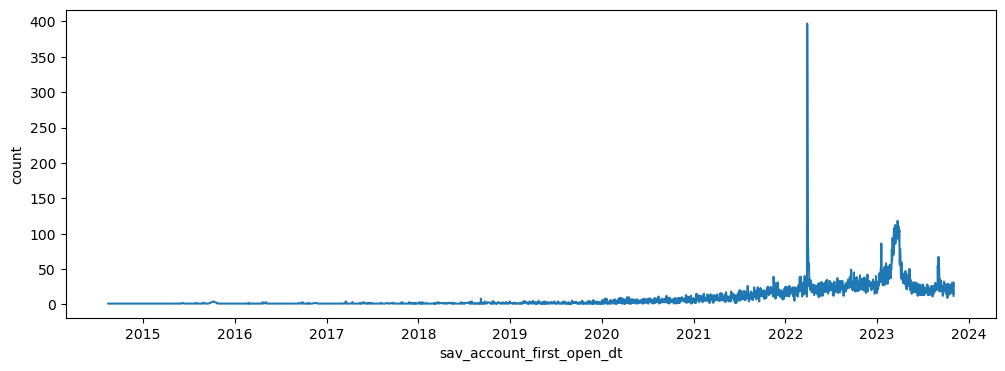

In [17]:
dfpl = pl.from_pandas(df)
fix, ax = plt.subplots(figsize=(12, 4))
sns.lineplot(
    dfpl.group_by("sav_account_first_open_dt").count().to_pandas(),
    x="sav_account_first_open_dt",
    y="count",
)

<Axes: xlabel='cln_account_first_open_dt', ylabel='count'>

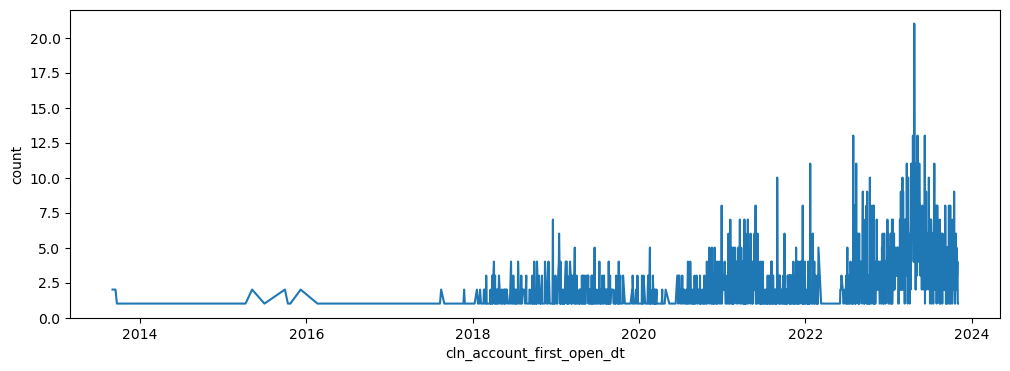

In [18]:
dfpl = pl.from_pandas(df)
fix, ax = plt.subplots(figsize=(12, 4))
sns.lineplot(
    dfpl.group_by("cln_account_first_open_dt").count().to_pandas(),
    x="cln_account_first_open_dt",
    y="count",
)

<Axes: xlabel='pos_account_first_open_dt', ylabel='count'>

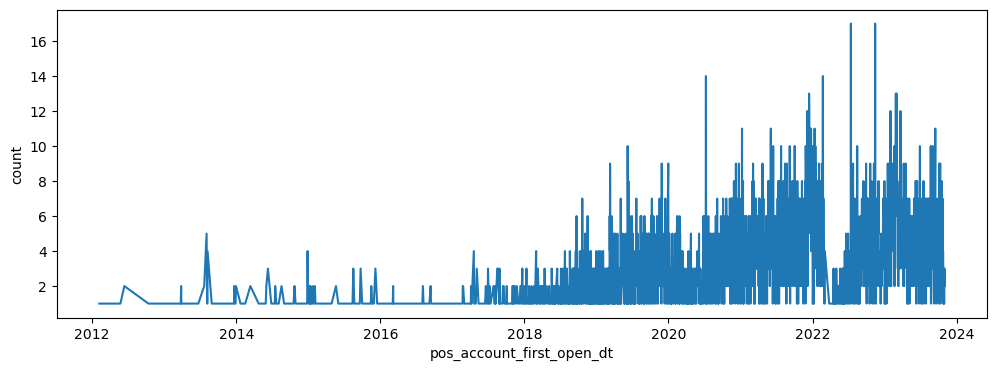

In [19]:
dfpl = pl.from_pandas(df)
fix, ax = plt.subplots(figsize=(12, 4))
sns.lineplot(
    dfpl.group_by("pos_account_first_open_dt").count().to_pandas(),
    x="pos_account_first_open_dt",
    y="count",
)

<Axes: xlabel='primary_income_dt', ylabel='value'>

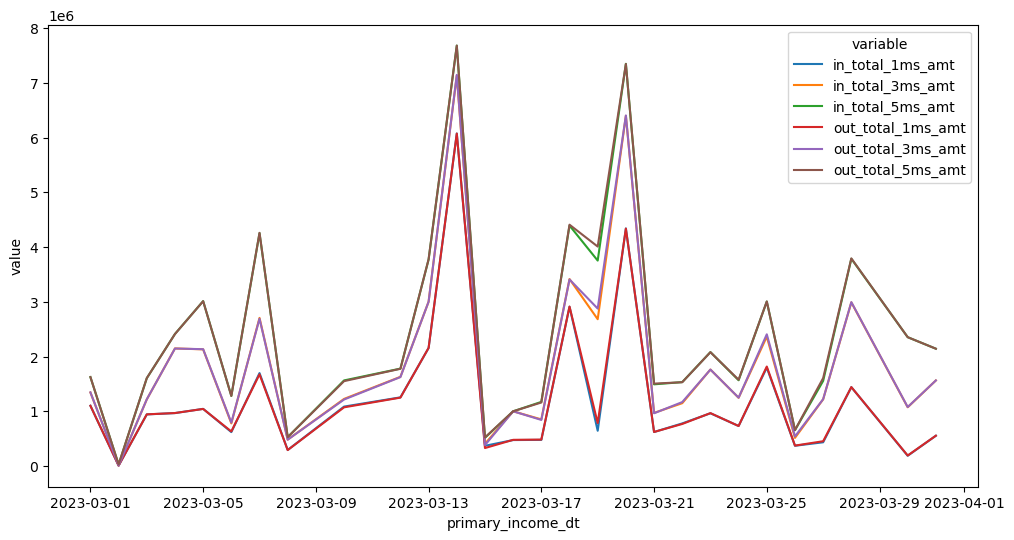

In [69]:
fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(
    x="primary_income_dt",
    y="value",
    hue="variable",
    data=pd.melt(
        pl.from_pandas(df)
        .drop_nulls()
        .select(cs.by_dtype(pl.NUMERIC_DTYPES), pl.col("primary_income_dt"))
        .group_by("primary_income_dt")
        .median()
        .select(pl.exclude(["Unnamed: 0", "party_rk"]))
        .select(
            pl.col(
                [
                    "primary_income_dt",
                    "in_total_1ms_amt",
                    "in_total_3ms_amt",
                    "in_total_5ms_amt",
                    "out_total_1ms_amt",
                    "out_total_3ms_amt",
                    "out_total_5ms_amt",
                ]
            )
        )
        .to_pandas(),
        ["primary_income_dt"],
    ),
)

<Axes: xlabel='primary_income_dt', ylabel='value'>

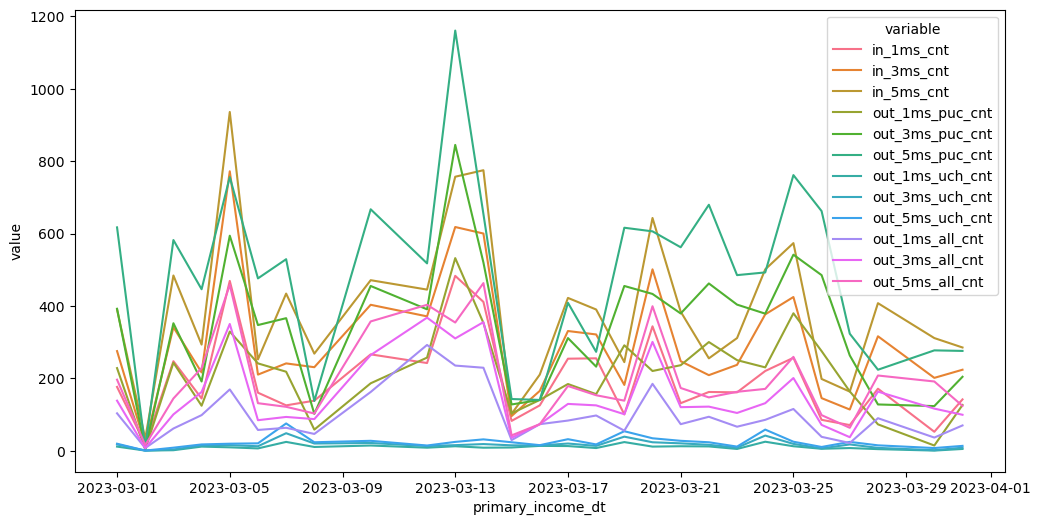

In [70]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(
    x="primary_income_dt",
    y="value",
    hue="variable",
    data=pd.melt(
        pl.from_pandas(df)
        .drop_nulls()
        .select(cs.by_dtype(pl.NUMERIC_DTYPES), pl.col("primary_income_dt"))
        .group_by("primary_income_dt")
        .median()
        .select(pl.exclude(["Unnamed: 0", "party_rk", "subscription_time"]))
        .select(
            pl.col(
                [
                    "primary_income_dt",
                    "in_1ms_cnt",
                    "in_3ms_cnt",
                    "in_5ms_cnt",
                    "out_1ms_puc_cnt",
                    "out_3ms_puc_cnt",
                    "out_5ms_puc_cnt",
                    "out_1ms_uch_cnt",
                    "out_3ms_uch_cnt",
                    "out_5ms_uch_cnt",
                    "out_1ms_all_cnt",
                    "out_3ms_all_cnt",
                    "out_5ms_all_cnt",
                ]
            )
        )
        .to_pandas(),
        ["primary_income_dt"],
    ),
)

<Axes: xlabel='primary_income_dt', ylabel='value'>

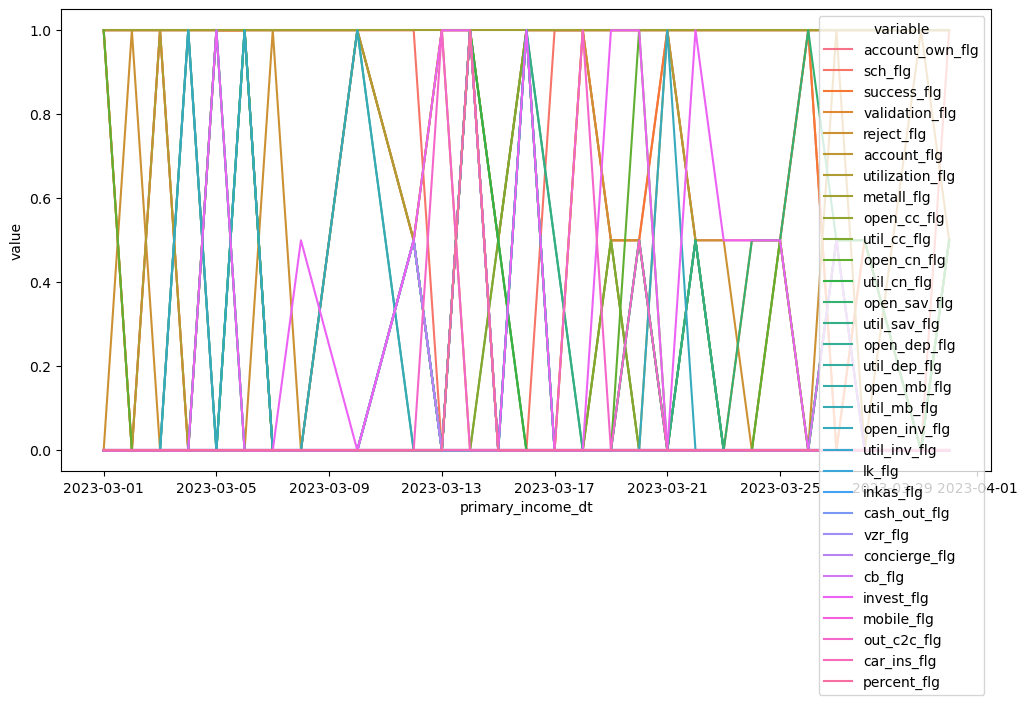

In [71]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(
    x="primary_income_dt",
    y="value",
    hue="variable",
    data=pd.melt(
        pl.from_pandas(df)
        .drop_nulls()
        .select(cs.by_dtype(pl.NUMERIC_DTYPES), pl.col("primary_income_dt"))
        .group_by("primary_income_dt")
        .median()
        .select(pl.exclude(["Unnamed: 0", "party_rk", "subscription_time"]))
        .select(
            pl.exclude(
                [
                    "in_1ms_cnt",
                    "in_3ms_cnt",
                    "in_5ms_cnt",
                    "out_1ms_puc_cnt",
                    "out_3ms_puc_cnt",
                    "out_5ms_puc_cnt",
                    "out_1ms_uch_cnt",
                    "out_3ms_uch_cnt",
                    "out_5ms_uch_cnt",
                    "out_1ms_all_cnt",
                    "out_3ms_all_cnt",
                    "out_5ms_all_cnt",
                    "in_total_1ms_amt",
                    "in_total_3ms_amt",
                    "in_total_5ms_amt",
                    "out_total_1ms_amt",
                    "out_total_3ms_amt",
                    "out_total_5ms_amt",
                ]
            )
        )
        .to_pandas(),
        ["primary_income_dt"],
    ),
)

<Axes: xlabel='primary_income_dt', ylabel='subscription_time'>

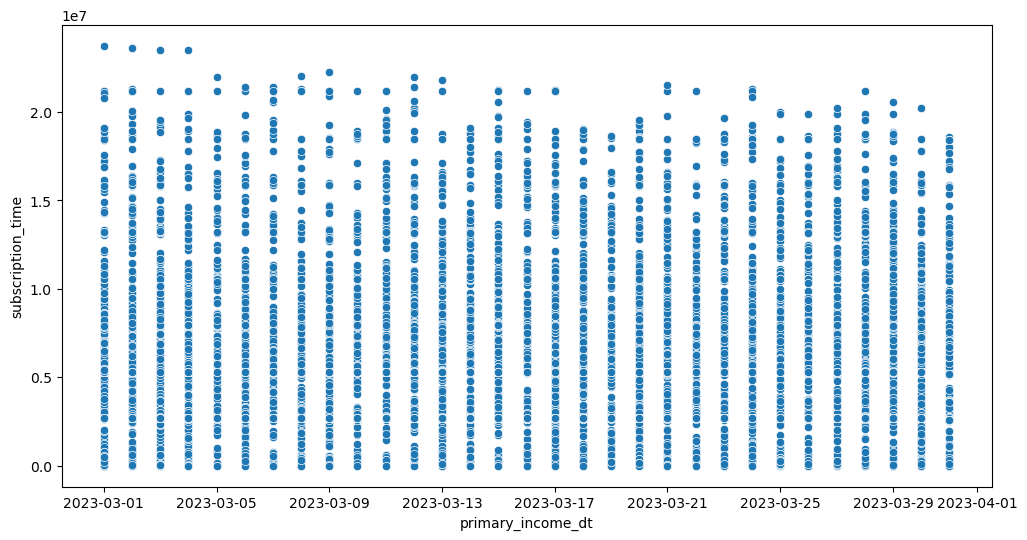

In [88]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.scatterplot(
    x="primary_income_dt",
    y="subscription_time",
    data=pl.from_pandas(df)
    .select(["primary_income_dt", "subscription_time"])
    .to_pandas(),
)

In [87]:
pl.from_pandas(df).select(
    ["primary_income_dt", "subscription_time"]
).to_pandas()

,primary_income_dt,subscription_time
0,2023-03-05,NaN
1,2023-03-05,2.678398e+06
2,2023-03-09,8.771054e+04
3,2023-03-13,2.772449e+06
4,2023-03-03,5.274360e+06
...,...,...
73707,2023-03-14,5.271507e+06
73708,2023-03-21,NaN
73709,2023-03-03,NaN
73710,2023-03-09,NaN


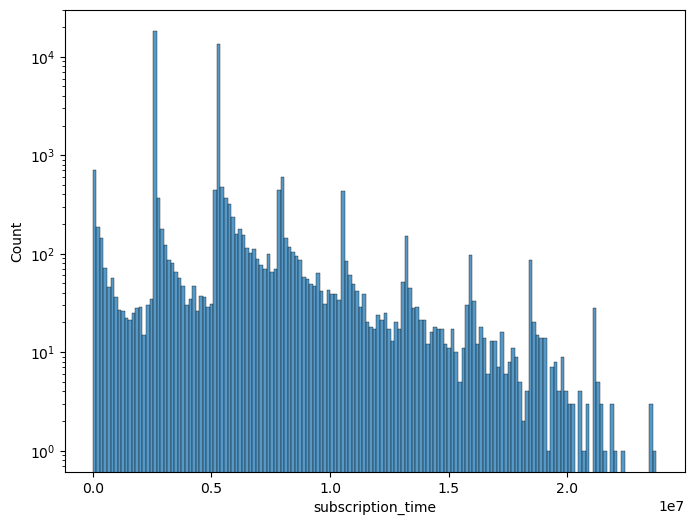

In [107]:
fix, ax = plt.subplots(figsize=(8,6))
sns.histplot(df, x="subscription_time")
ax.set_yscale("log")

In [110]:
df.party_rk.value_counts().head(10)

party_rk
894616401.0    37
975556470.0    17
942945895.0    16
758440356.0    14
996050062.0    13
802154105.0    13
778069088.0    12
598093055.0    12
786154765.0    11
505419264.0    10
Name: count, dtype: int64

In [112]:
df.channel_desc.value_counts()

channel_desc
МБ     59608
Web    14104
Name: count, dtype: int64

In [117]:
df.channel_desc = df.channel_desc.map({"Web": 0, "МБ": 1})

<Axes: >

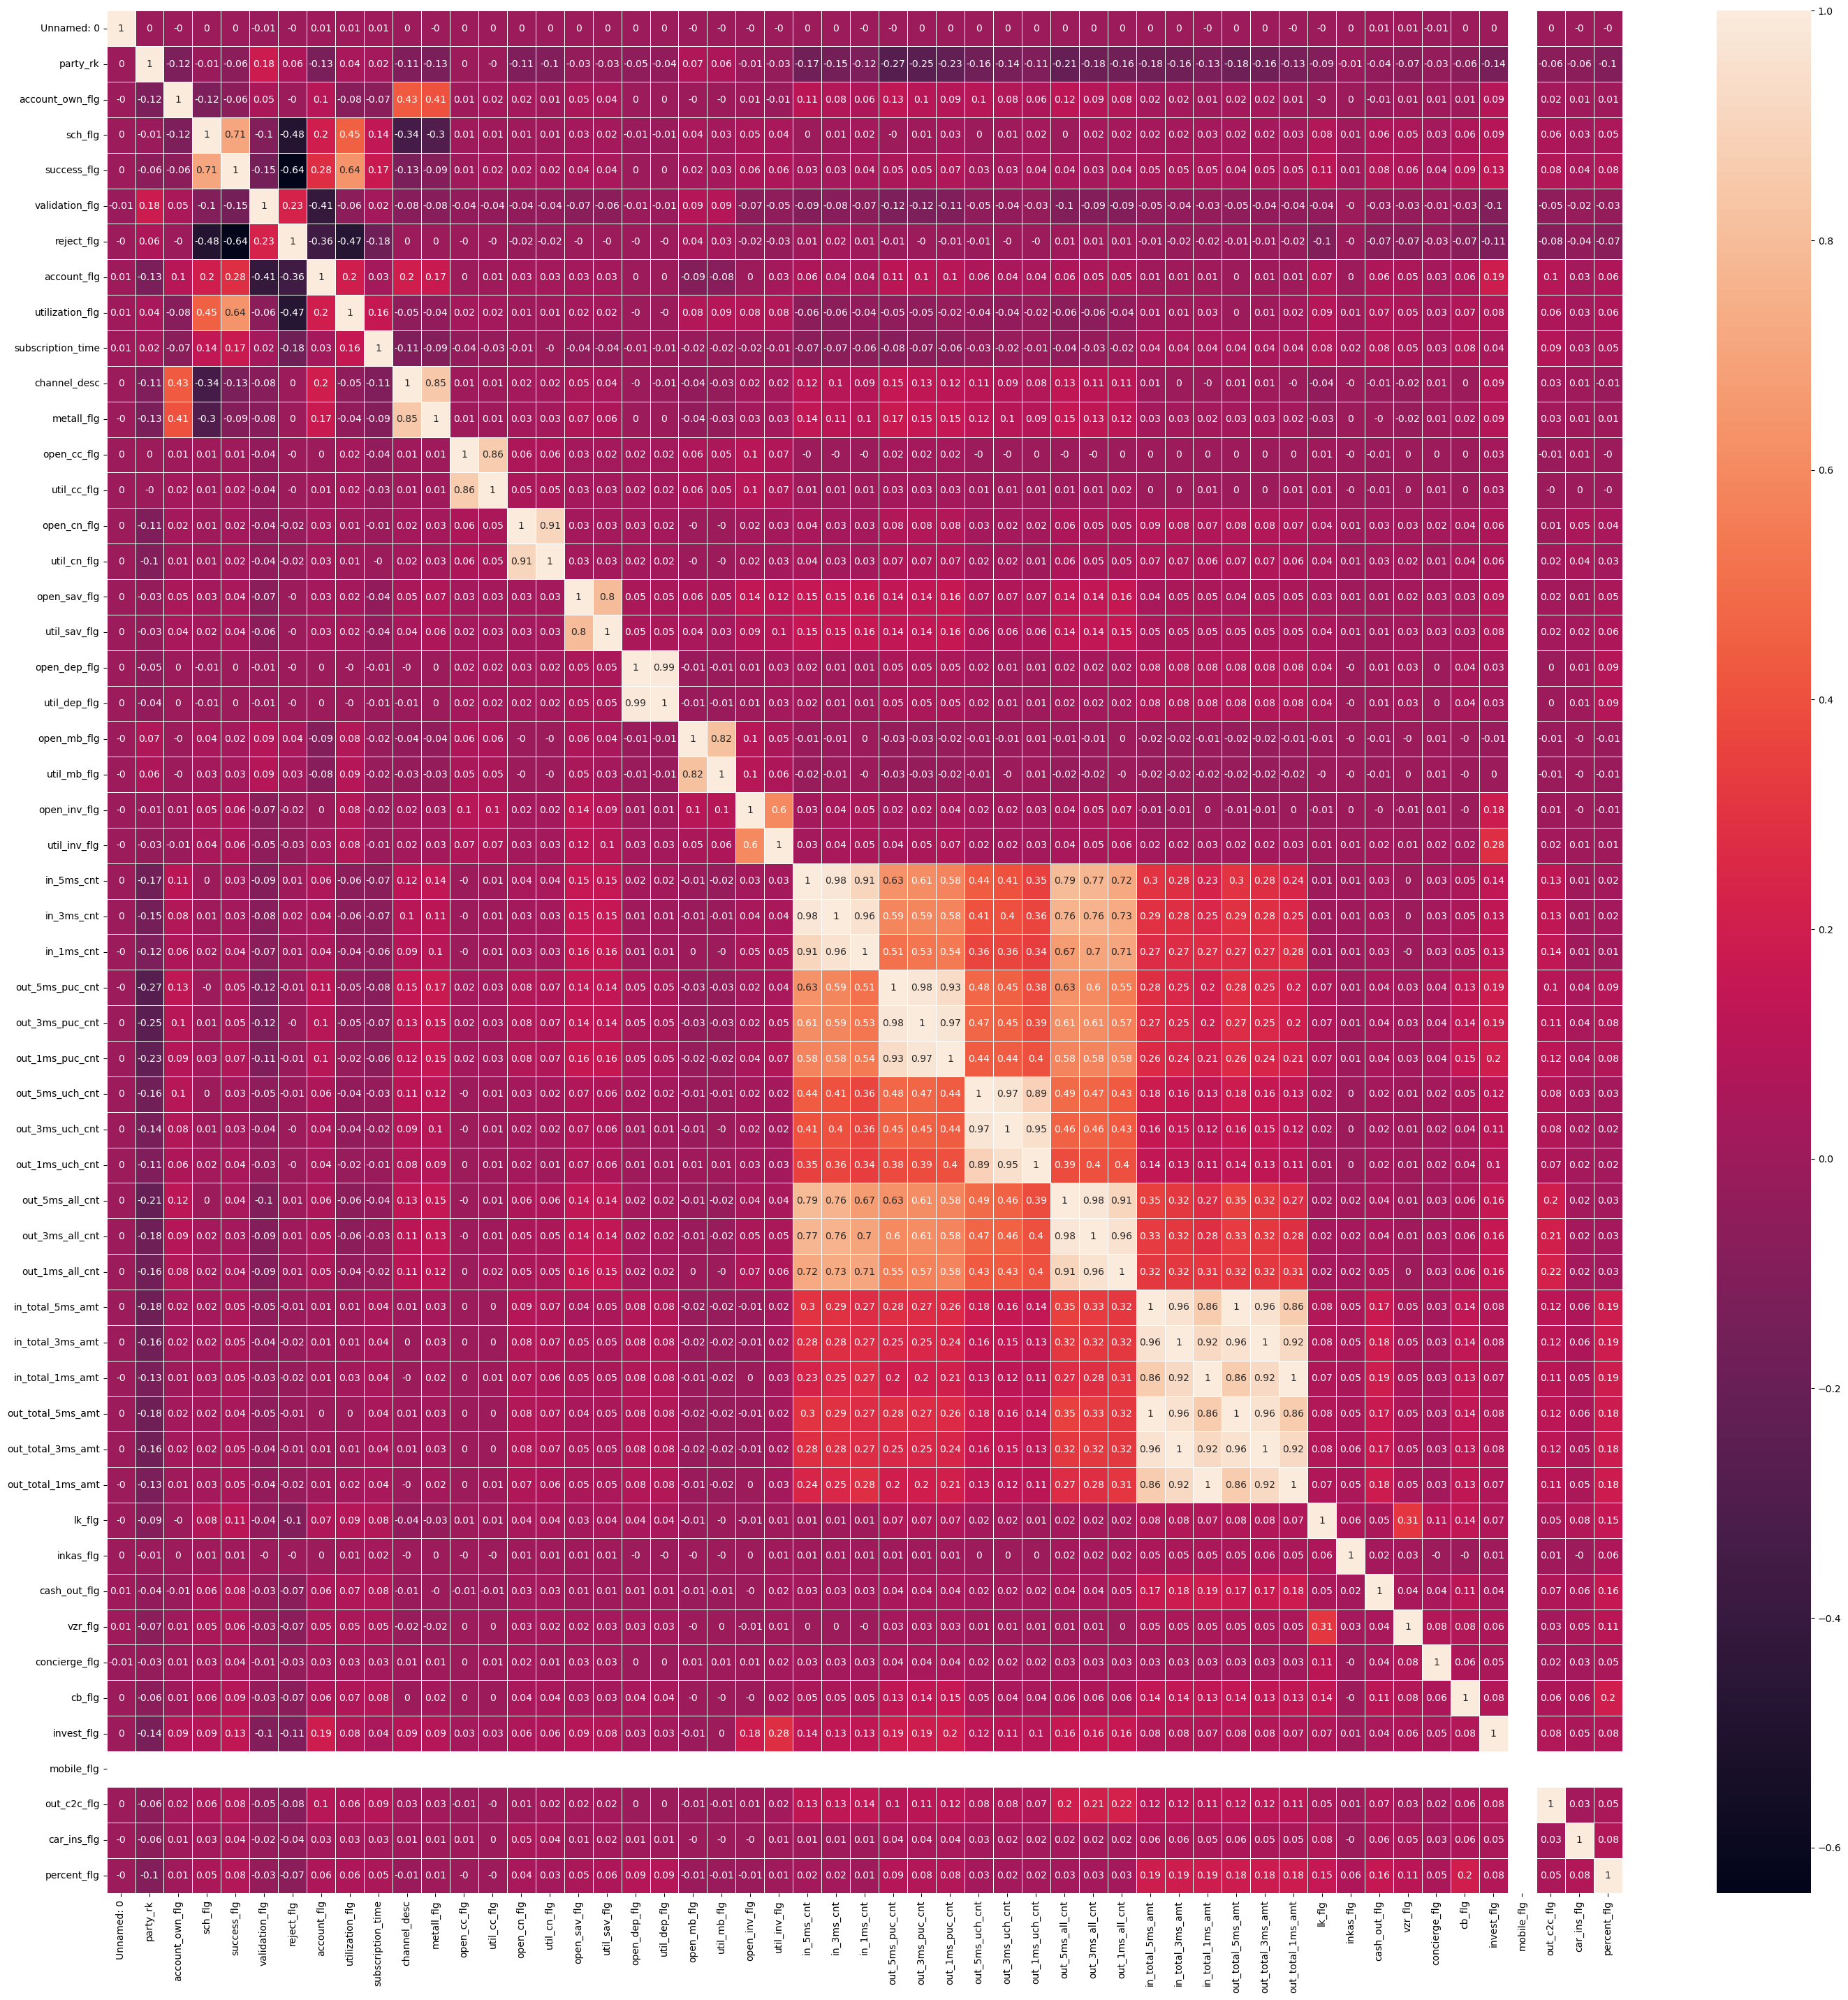

In [118]:
fig, ax = plt.subplots(figsize=(35, 35))  # Sample figsize in inches
sns.heatmap(
    df
    .corr(numeric_only=True)
    .round(2),
    annot=True,
    linewidths=0.5,
    fmt="g",
)

<Axes: >

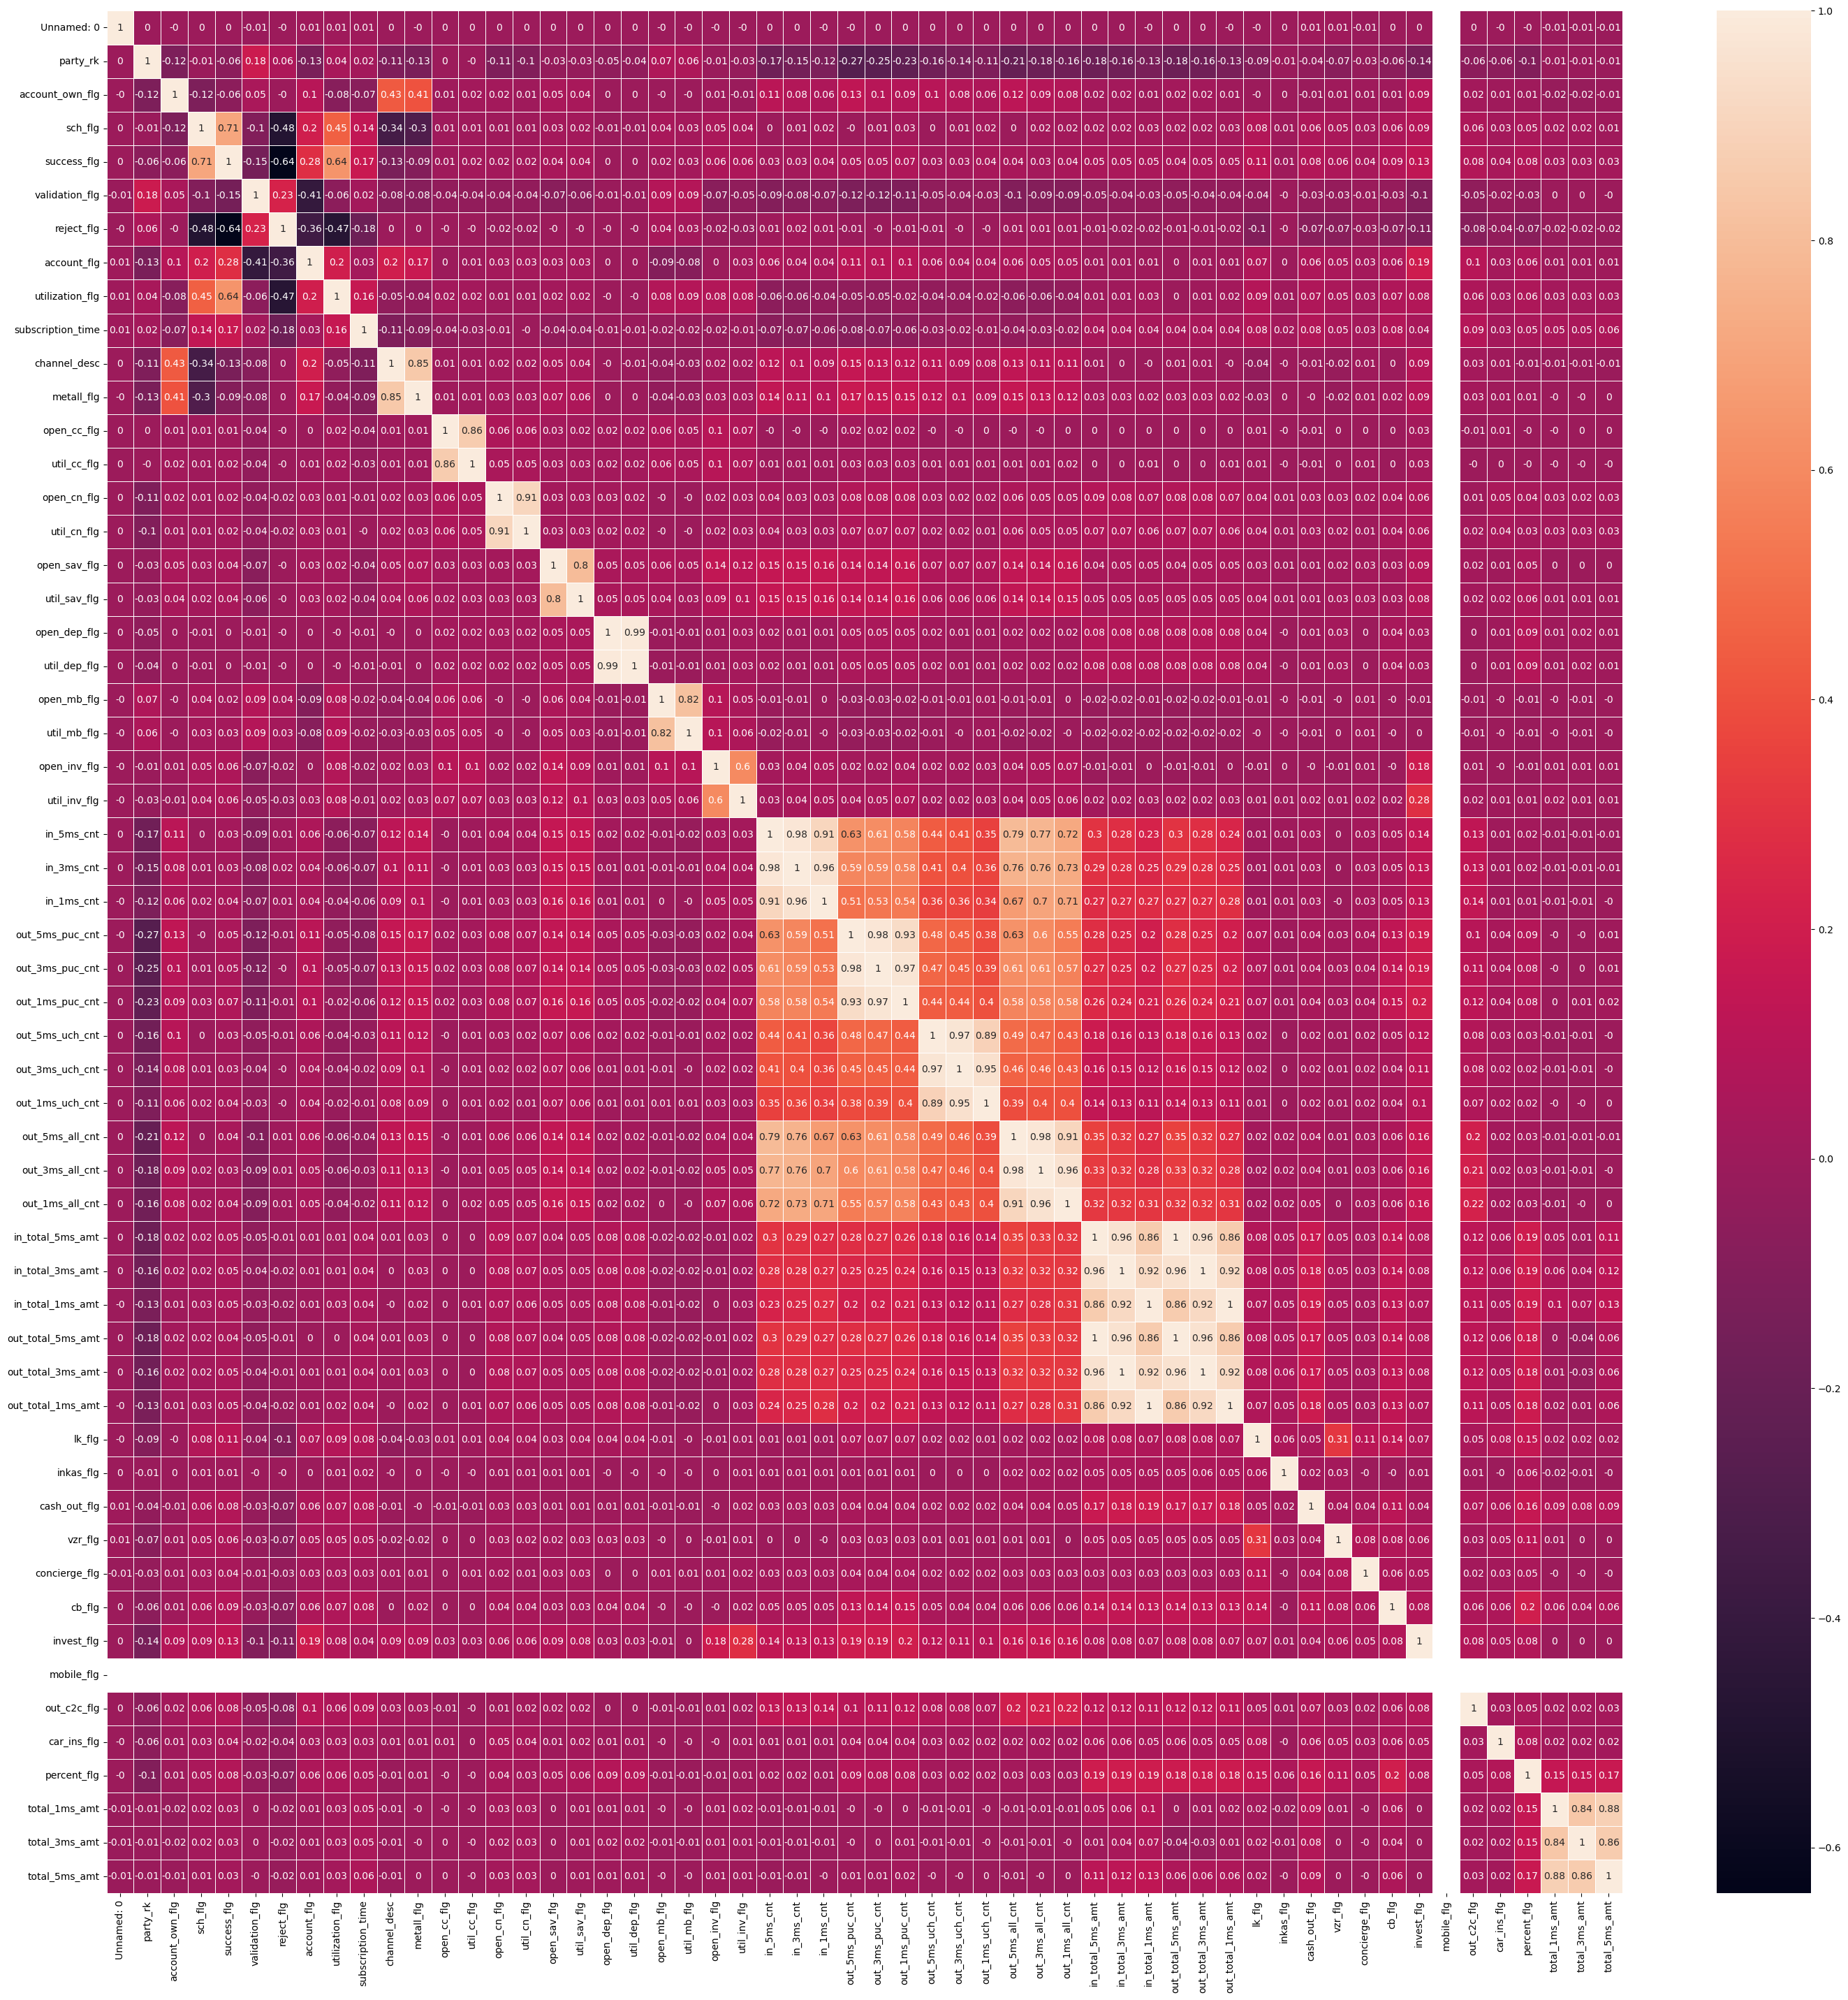

In [119]:
fig, ax = plt.subplots(figsize=(35, 35))  # Sample figsize in inches
sns.heatmap(
    pl.from_pandas(df).with_columns(
        (pl.col("in_total_1ms_amt") - pl.col("out_total_1ms_amt")).alias(
            "total_1ms_amt"
        ),
        (pl.col("in_total_3ms_amt") - pl.col("out_total_3ms_amt")).alias(
            "total_3ms_amt"
        ),
        (pl.col("in_total_5ms_amt") - pl.col("out_total_5ms_amt")).alias(
            "total_5ms_amt"
        ),
    )
    .to_pandas()
    .corr(numeric_only=True)
    .round(2),
    annot=True,
    linewidths=0.5,
    fmt="g",
)